<a href="https://colab.research.google.com/github/paul821/nesarc/blob/main/parolee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Executive Summary

yuh. proceed with the acquisitions of monetary assets in the form of cash.

Problem statement

The purpose of this study was to evaluate whether drug related factors (such as age of first marijuana usage and opiate usage in the past thirty days) or alcohol related factors (such as number of can beer drank per day) more heavily affect whether parolees commit crimes after 9 months of release. 

Lots of TV shows based on crime investigation feature drug addicts much more prominently, and show that drug addiction comes back even after being released to the outside world. However, there isn’t as much spotlight shone on alcohol addiction, and I want to see whether alcohol addiction really doesn’t have much of an impact on parolees committing crimes after 9 months. 

This would allow for the government to allocate its resource effectively so that they can better track parolees who are more prone to committing crimes, as well as putting greater regulation on alcohol or drug usage.


Data

The response variable was a categorical variable ANYCRIME that measured whether the parolee committed a crime or not. 

The explanatory variables were loaded from the Intake Codebook, and included the following for the alcohol-related variables: 
* AGE1ALC - quantitative variable measuring age of first alcohol usage 

* ALC30D - categorical variable measuring the degree of alcohol usage for the past 30 days 

* ALCDYS - quantitative variable measuring number of days of alcohol usage for past 30 days 

* ALCPRB1 - categorical variable measuring the degree of alcohol affecting physical health for past six months 

* ALCPRB3 - categorical variable measuring the degree of alcohol affecting emotional health for past six months 

* OUNCE_LIQ – quantitative variable measuring number of glasses of alcohol consumed per day; created by summing the product of number of glasses by size of glass for each type of liquor 

The following for the drug-related variables: 
* AGE1MJ - quantitative variable measuring age of first marijuana usage 

* MJ30D - categorical variable measuring the degree of marijuana usage for the past 30 days 

* AGE1COC - quantitative variable measuring age of first cocaine usage 

* COC30D - categorical variable measuring the degree of cocaine usage for the past 30 days 

* DRGPRB1 - categorical variable measuring the degree of drugs affecting physical health for past six months 

* DRGPRB3 - categorical variable measuring the degree of drugs affecting emotional health for past six months 

Since dropping blank data points would result in only eight full samples of data being analyzed, blank data points were all converted to 0. 0 denies the presence of the variable in both categorical (ex. 0 in DRGPRB1 means that the parolee felt that they had no influence of drug on their physical health) and quantitative (ex. 0 in AGE1COC means that the parolee never did cocaine) explanatory variables, carrying the same meaning as having null data points.

In [ ]:
#import packages

import numpy
import pandas
import statsmodels.api as sm
import seaborn
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import scipy.stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pandas.read_csv('stepnout.csv', low_memory=False)

data cleaning

In [ ]:
data = data.apply(pandas.to_numeric, errors='coerce')
data=data.replace(numpy.nan, 0)
data.replace('', 0)
data.replace(' ',0)
data.fillna(0)

,cid,AGE,CHISP,CHETHN,cblack,casian,cnative,cwhite,cpacisl,cothrac,JAILCNM,RTPRRC,RTARRC,TCU001,TCU002,TCU003,TCU004a,TCU004b,TCU005,TCU006a,TCU006b,TCU006c,TCU007,TCU008,TCU009,TCUTOT,LCSF001,LCSF002,LCSF003,LCSF004,LCSF005,LCSF006,LCSF007,LCSF008,LCSF009,LCSF010,LCSF011,LCSF012,LCSF013,LCSFSC1,...,amptlfb_9,libtlfb_9,barbtlfb_9,sedtlfb_9,ghbtlfb_9,kettlfb_9,othdrugtlfb_9,arst1tlfb_9,arst2tlfb_9,arst3tlfb_9,arst4tlfb_9,arst5tlfb_9,arst6tlfb_9,arst7tlfb_9,arst8tlfb_9,arst9tlfb_9,arst10tlfb_9,arst11tlfb_9,arst12tlfb_9,arst13tlfb_9,arst14tlfb_9,arst15tlfb_9,arst16tlfb_9,arst17tlfb_9,arst18tlfb_9,arst19tlfb_9,arst20tlfb_9,arst21tlfb_9,arst22tlfb_9,arst23tlfb_9,arst24tlfb_9,arst25tlfb_9,alctlfb_9,alc5tlfb_9,allarrests,anyarrest,alldrugs,anydrugs,allcrimes,anycrime
0,2180,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0
1,2181,26.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,6.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,2183,46.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,6.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2185,26.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0
4,2187,37.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,9239,37.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
472,9240,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
473,9241,41.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
474,9245,39.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
data.columns = data.columns.str.upper()



data['COC30D'].replace(numpy.nan, 0, inplace=True)
data['HMINJ30'].replace(numpy.nan, 0, inplace=True)
data['AMINJ30'].replace(numpy.nan, 0, inplace=True)

creating new variable (total liquor consumed) from combining smaller ones

In [ ]:
data['OUNCE_LIQ']=data['BEERDYS']*data['AMTBEER']*data['SZBEER']+ \
  data['MALTDYS']*data['AMTMALT']*data['SZMALT']+ \
  data['WINEDYS']*data['AMTWINE2']*data['SZWINE']+ \
  data['FWINEDYS']*data['AMTFWIN2']*data['SZFWINE']+ \
  data['LIQRDYS']*data['AMTLIQ2']*data['SZLIQUOR']

first age of consuming whatever substance

In [ ]:
age = ['AGE1INH', 'AGE1MJ', 'AGE1HLC', 'AGE1CRK', 'AGE1COC',
'AGE1HCO', 'AG1HCIN', 'AGE1HMO', 'AG1HMIN', 'AGE1HER', 'AG1HEIN', 'AG1MTIN',
'AGE1OPI','AG1OPIN','AGE1MET','AG1MEIN','AGE1AMP','AG1AMIN','AGE1LIB','AG1LBIN',
'AGE1BAR','AG1BAIN','AGE1SED','AGE1GHB','AGE1KET','AG1KTIN',
'AGE1OTH','AG1OTIN']

data1 = data.copy()
for x in age:
  data1[x].replace(0, 9999, inplace=True)
data1[age].describe()
data['MIN_AGE']=data1[age].min(axis=1)

if 9999 in data['MIN_AGE'].unique():
  data['MIN_AGE'].replace(9999, 0, inplace=True)

data['MIN_AGE'].describe()

count    476.000000
mean      14.142857
std        4.922192
min        0.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       43.000000
Name: MIN_AGE, dtype: float64

encoding qualitative responses to an arbitrary quantitative scale for easier visualization

In [ ]:
recode1 = {0:0, 1:2, 2:1, 3:2.5, 4:4, 5:16, 6:30, 7:75, 8:150, 9:150}
data['ALC30D']= data['ALC30D'].map(recode1) 

data['INH30D']= data['INH30D'].map(recode1) #centering exp
data['MJ30D']= data['MJ30D'].map(recode1)
data['HLUC30D']= data['HLUC30D'].map(recode1)
data['CRCK30D']= data['CRCK30D'].map(recode1)
data['COC30D']= data['COC30D'].map(recode1)
data['COINJ30']= data['COINJ30'].map(recode1)
data['HCOC30D']= data['HCOC30D'].map(recode1)
data['HCINJ30']= data['HCINJ30'].map(recode1)
data['HMTH30D']= data['HMTH30D'].map(recode1)
data['HMINJ30']= data['HMINJ30'].map(recode1)
data['HER30D']= data['HER30D'].map(recode1)
data['HEINJ30']= data['HEINJ30'].map(recode1)
data['MTHD30D']= data['MTHD30D'].map(recode1)
data['MTINJ30']= data['MTINJ30'].map(recode1)
data['OPIAT30D']= data['OPIAT30D'].map(recode1)
data['OPINJ30']= data['OPINJ30'].map(recode1)
data['META30D']= data['META30D'].map(recode1)
data['AMPH30D']= data['AMPH30D'].map(recode1)
data['AMINJ30']= data['AMINJ30'].map(recode1)
data['LIB30D']= data['LIB30D'].map(recode1)
data['BARB30D']= data['BARB30D'].map(recode1)
data['SED30D']= data['SED30D'].map(recode1)
data['OTHD30D']= data['OTHD30D'].map(recode1)
data['OTHINJ30']= data['OTHINJ30'].map(recode1)

a way to visualize how much drugs consumed in 30 days

In [ ]:
thirtydays = [
  'INH30D','MJ30D','HLUC30D','CRCK30D','COC30D','COINJ30','HCOC30D','HCINJ30',
  'HMTH30D','HMINJ30','HER30D','HEINJ30','MTHD30D','MTINJ30','OPIAT30D',
  'OPINJ30','META30D','AMPH30D','AMINJ30','LIB30D','BARB30D',
  'SED30D','OTHD30D','OTHINJ30'
]

data['DRUG30D']=0

for x in thirtydays:
  data['DRUG30D']+=data[x]

In [ ]:
dic = {
    'AGE1ALC':'age of first alcohol usage',
    'ALC30D':'times of alcohol usage in past month',
    'ALCPRB1':'degree of alcohol affecting physical health for past six months',
    'ALCPRB3':'degree of alcohol affecting emotional health for past six months',
    'ALCPRB5':'degree of alcohol affecting work for past six months',
    'OUNCE_LIQ':'bottles of alcohol consumed in past month',

    'MIN_AGE':'age of first drug usage',
    'DRUG30D':'times of drug usage in past month',
    'DRGPRB1':'degree of drugs affecting physical health for past six months',
    'DRGPRB3':'degree of drugs affecting emotional health for past six months',
    'DRGPRB5':'degree of drugs affecting work for past six months',
    'AIDSR5':'times of drug injection in past month',
}

dict_keys(['AGE1ALC', 'ALC30D', 'ALCPRB1', 'ALCPRB3', 'ALCPRB5', 'OUNCE_LIQ', 'MIN_AGE', 'DRUG30D', 'DRGPRB1', 'DRGPRB3', 'DRGPRB5', 'AIDSR5'])


exploratory data analysis (univariate)

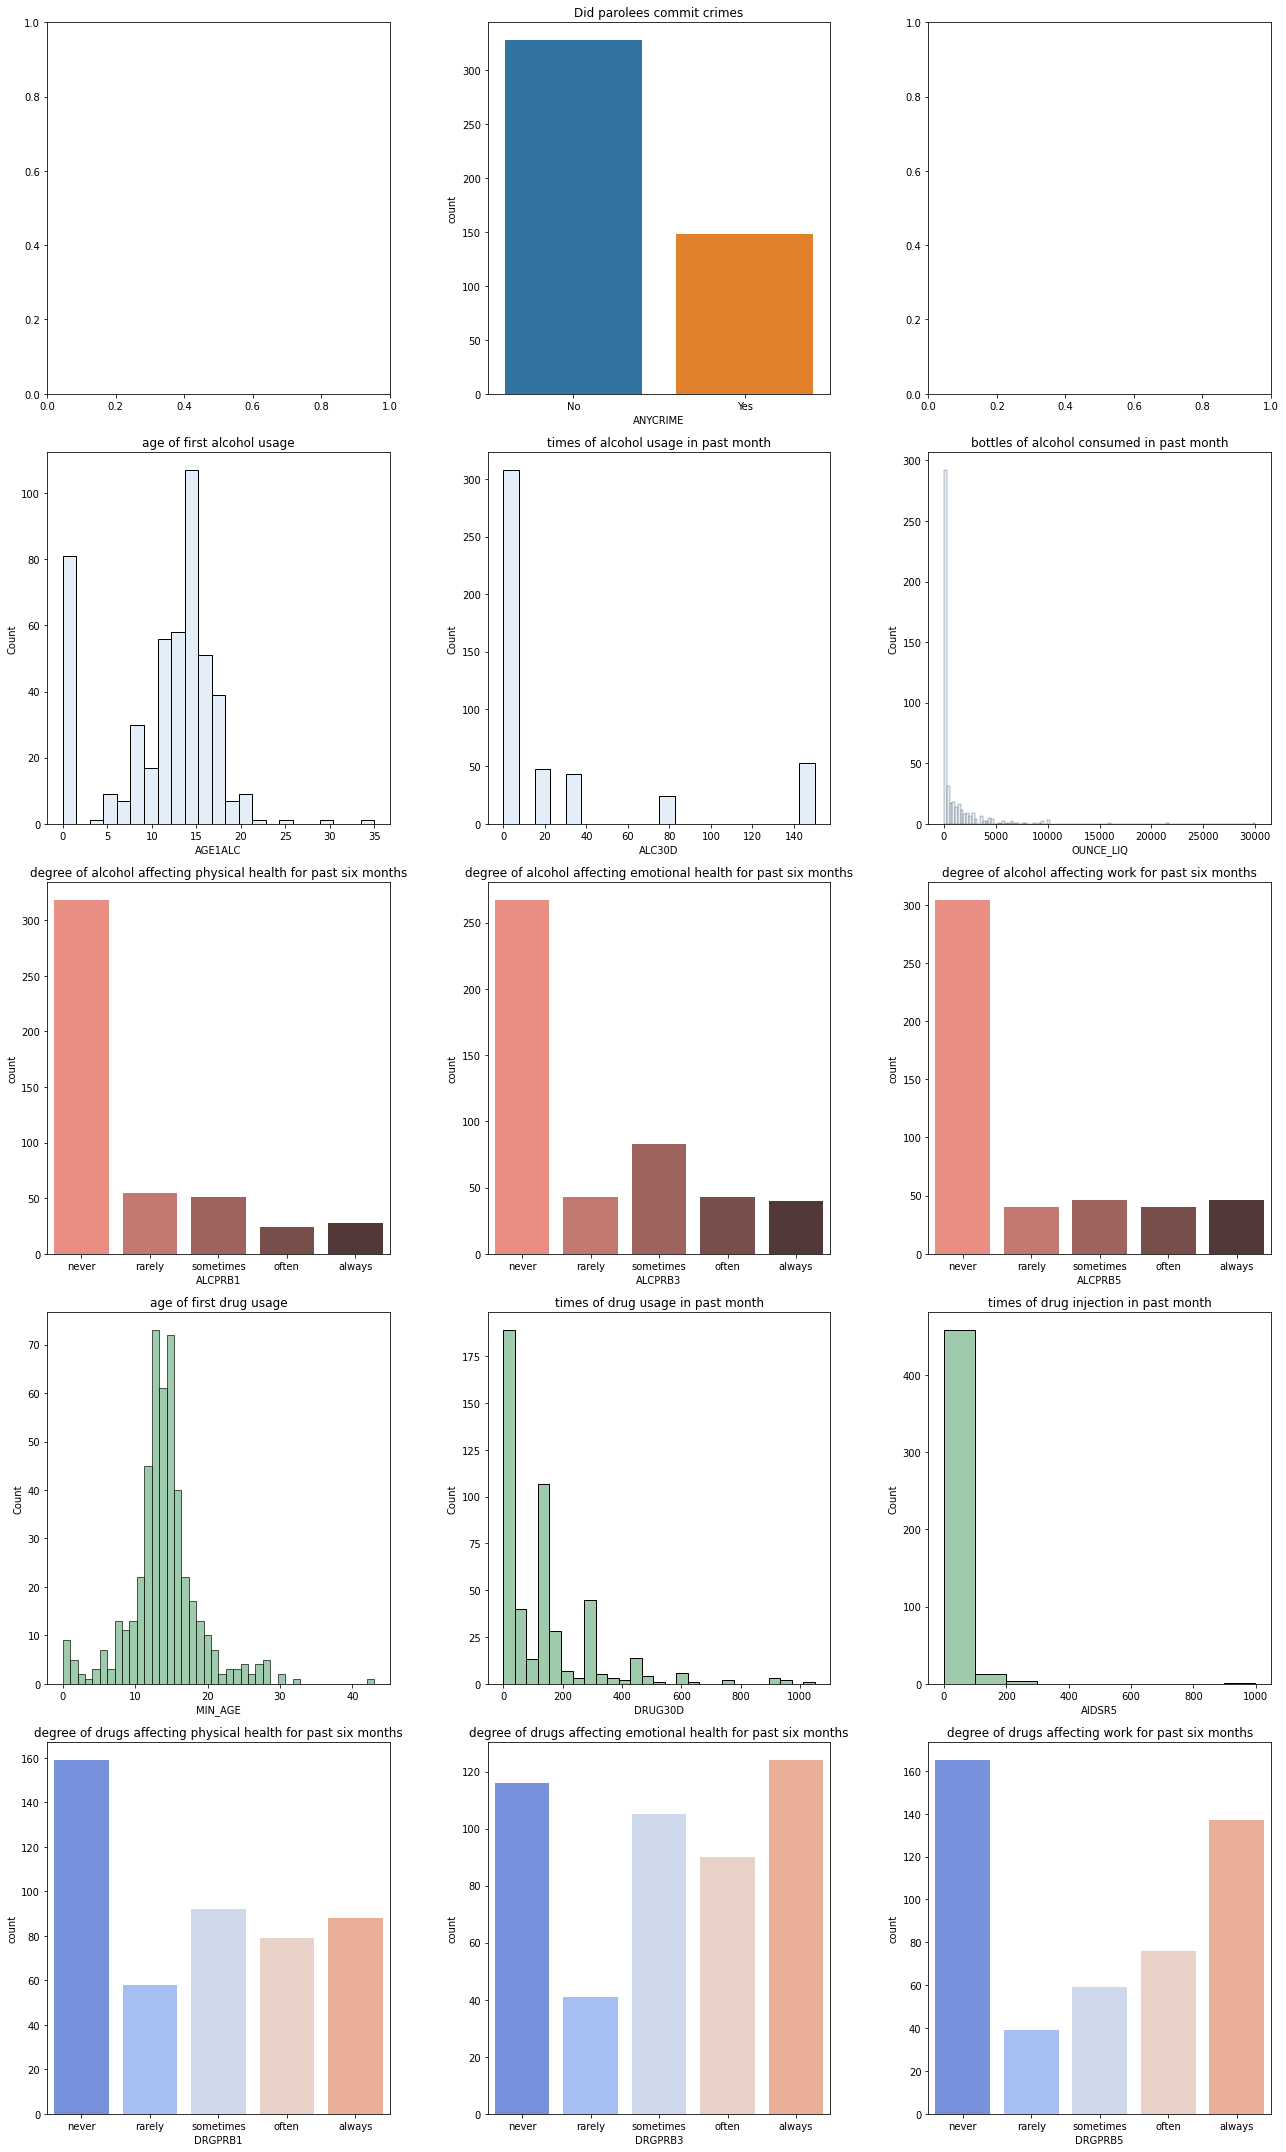

In [ ]:
#univariate bar graph for categorical variables
# First change format from numeric to categorical

data2 = data.copy()
fig, axes = plt.subplots(5, 3, figsize = (18, 30))
fig.suptitle('')

seaborn.light_palette("seagreen")
data2['ANYCRIME'] = data2['ANYCRIME'].astype('category')
data2['ANYCRIME']=data2['ANYCRIME'].cat.rename_categories(["No", "Yes"])
seaborn.countplot(ax=axes[0,1], x='ANYCRIME', data=data2)
axes[0,1].set_title('Did parolees commit crimes')

seaborn.set_palette("Blues")
seaborn.histplot(ax=axes[1,0], x='AGE1ALC', data=data2, kde=False)
axes[1,0].set_title(dic['AGE1ALC'])

seaborn.set_palette("Blues")
seaborn.histplot(ax=axes[1,1], x='ALC30D', data=data2, kde=False)
axes[1,1].set_title(dic['ALC30D'])

seaborn.set_palette("Blues")
seaborn.histplot(ax=axes[1,2], x='OUNCE_LIQ', data=data2, kde=False)
axes[1,2].set_title(dic['OUNCE_LIQ'])

data2['ALCPRB1'] = data2['ALCPRB1'].astype('category')
data2['ALCPRB1']=data2['ALCPRB1'].cat.rename_categories(["never", "rarely","sometimes","often","always"])
seaborn.set_palette("dark:salmon_r")
seaborn.countplot(ax=axes[2,0], x='ALCPRB1', data=data2)
axes[2,0].set_title(dic['ALCPRB1'])

data2['ALCPRB3'] = data2['ALCPRB3'].astype('category')
data2['ALCPRB3']=data2['ALCPRB3'].cat.rename_categories(["never", "rarely","sometimes","often","always"])
seaborn.set_palette("dark:salmon_r")
seaborn.countplot(ax=axes[2,1], x='ALCPRB3', data=data2)
axes[2,1].set_title(dic['ALCPRB3'])

data2['ALCPRB5'] = data2['ALCPRB5'].astype('category')
data2['ALCPRB5']=data2['ALCPRB5'].cat.rename_categories(["never", "rarely","sometimes","often","always"])
seaborn.set_palette("dark:salmon_r")
seaborn.countplot(ax=axes[2,2], x='ALCPRB5', data=data2)
axes[2,2].set_title(dic['ALCPRB5'])




seaborn.set_palette("crest")
seaborn.histplot(ax=axes[3,0], x='MIN_AGE', data=data2, kde=False)
axes[3,0].set_title(dic['MIN_AGE'])

seaborn.set_palette("crest")
seaborn.histplot(ax=axes[3,1], x='DRUG30D', data=data2, kde=False)
axes[3,1].set_title(dic['DRUG30D'])

seaborn.set_palette("crest")
seaborn.histplot(ax=axes[3,2], x='AIDSR5', data=data2, kde=False)
axes[3,2].set_title(dic['AIDSR5'])

data2['DRGPRB1'] = data2['DRGPRB1'].astype('category')
data2['DRGPRB1']=data2['DRGPRB1'].cat.rename_categories(["never", "rarely","sometimes","often","always"])
seaborn.set_palette("coolwarm")
seaborn.countplot(ax=axes[4,0], x='DRGPRB1', data=data2)
axes[4,0].set_title(dic['DRGPRB1'])

data2['DRGPRB3'] = data2['DRGPRB3'].astype('category')
data2['DRGPRB3']=data2['DRGPRB3'].cat.rename_categories(["never", "rarely","sometimes","often","always"])
seaborn.set_palette("coolwarm")
seaborn.countplot(ax=axes[4,1], x='DRGPRB3', data=data2)
axes[4,1].set_title(dic['DRGPRB3'])

data2['DRGPRB5'] = data2['DRGPRB5'].astype('category')
data2['DRGPRB5']=data2['DRGPRB5'].cat.rename_categories(["never", "rarely","sometimes","often","always"])
seaborn.set_palette("coolwarm")
seaborn.countplot(ax=axes[4,2], x='DRGPRB5', data=data2)
axes[4,2].set_title(dic['DRGPRB5'])

plt.subplots_adjust(top=2)
plt.tight_layout()


random forest

[[121  17]
 [ 42  11]]
0.6910994764397905
[0.10877293 0.0766469  0.04686142 0.06021285 0.04443305 0.09176424
 0.1615699  0.13928279 0.06962695 0.07576006 0.06923604 0.05583286]


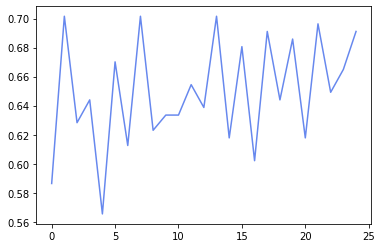

In [ ]:
# random forest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier


#Split into training and testing sets

predictors = data[dic.keys()]

targets = data.ANYCRIME

pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

#Build model on training data
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

#confusion matrix
print(sklearn.metrics.confusion_matrix(tar_test,predictions))
#accuracy
print(sklearn.metrics.accuracy_score(tar_test, predictions))


# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)


"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(25)
accuracy=numpy.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)


accuracy at 69%, 121 true positives, 17 false positives, 42 false negatives, 11 true negatives. highest important score is MIN_AGE. 1 tree, 7, 13 trees appear to be having the highest accuracy in the models. 

lasso

{'AGE1ALC': 0.0, 'ALC30D': 0.0, 'ALCPRB1': 0.0, 'ALCPRB3': 0.0, 'ALCPRB5': 0.0, 'OUNCE_LIQ': 0.0, 'MIN_AGE': 0.0, 'DRUG30D': 0.0, 'DRGPRB1': 0.0, 'DRGPRB3': 0.0, 'DRGPRB5': 0.0, 'AIDSR5': 0.0}
training data MSE
0.20891161431701968
test data MSE
0.22730082189541645
training data R-square
0.0
test data R-square
-0.009134717094956724


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


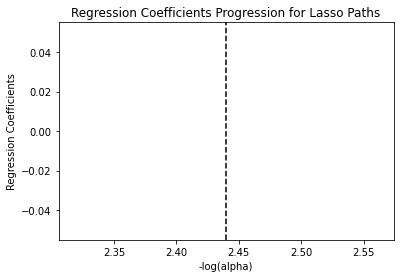

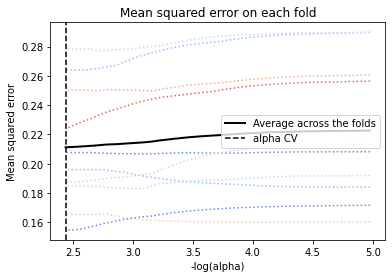

In [ ]:
from sklearn.linear_model import LassoLarsCV
#Split into training and testing sets

predictor = data[dic.keys()]

target = data.ANYCRIME

# standardize predictors to have mean=0 and sd=1
predictors=predictor.copy()
from sklearn import preprocessing

for col in predictors:
  predictors[col]=preprocessing.scale(predictors[col].astype('float64'))

# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

# print variable names and regression coefficients
print(dict(zip(predictors.columns, model.coef_)))

# plot coefficient progression
m_log_alphas = -numpy.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-numpy.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

# plot mean square error for each fold
m_log_alphascv = -numpy.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-numpy.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
         

# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)




Graph does not show. This does not seem very interpretable.

logistic

In [ ]:
# logistic regression with both explanatory
formula = 'ANYCRIME ~ ';
for x in dic.keys():
  if 'degree' in dic[x]:
    formula += ('C('+x+')+')
  else:
    formula += (x+'+')

formula = formula[:-1]

lreg = smf.logit(formula=formula, data=data).fit()
print (lreg.summary())

# odds ratios
print ("Odds Ratios")
print (numpy.exp(lreg.params))

# odd ratios with 95% confidence intervals
params = lreg.params
conf = lreg.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (numpy.exp(conf))


Optimization terminated successfully.
         Current function value: 0.576776
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               ANYCRIME   No. Observations:                  476
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                           30
Date:                Sun, 22 Aug 2021   Pseudo R-squ.:                 0.06947
Time:                        15:26:11   Log-Likelihood:                -274.55
converged:                       True   LL-Null:                       -295.04
Covariance Type:            nonrobust   LLR p-value:                   0.08698
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4449      0.442     -1.007      0.314      -1.311       0.421
C(ALCPRB

conclusion

limitations

reference

https://ir.ymlib.yonsei.ac.kr/bitstream/22282913/136096/1/TA01061.pdf